# Short exploration of attenuation in resulting GGO segmentation

In [19]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [20]:
%%capture
# Import function from other directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
from helper_functions import *

data_preprocess_dir = os.path.join(parent_dir, "DataPreprocess")
sys.path.append(data_preprocess_dir)
from main_preprocess import load_nifti_convert_to_numpy

In [21]:
ct_path = '/Users/bruger/Desktop/Bachelor/resampled_lung_pilot_data/cropped_lungs_ct'
results_path = '/Users/bruger/Desktop/Bachelor/nnUNet resultater/50 epoch resultater'

In [22]:
path_ct_010 = ct_path + '/lungCT_010_0000.nii.gz'
path_ct_025 = ct_path + '/lungCT_025_0000.nii.gz'

path_res_2d_010 = results_path + '/2d/lungCT_010.nii.gz'
path_res_2d_025 = results_path + '/2d/lungCT_025.nii.gz'

path_res_3d_010 = results_path + '/3d_fullres/lungCT_010.nii.gz'
path_res_3d_025 = results_path +'/3d_fullres/lungCT_025.nii.gz'

In [23]:
ct_010 = load_nifti_convert_to_numpy(input_path=path_ct_010)
ct_025 = load_nifti_convert_to_numpy(input_path=path_ct_025)

seg_2d_010 = load_nifti_convert_to_numpy(input_path=path_res_2d_010)
seg_2d_025 = load_nifti_convert_to_numpy(input_path=path_res_2d_025)
seg_3d_010 = load_nifti_convert_to_numpy(input_path=path_res_3d_010)
seg_3d_025 = load_nifti_convert_to_numpy(input_path=path_res_3d_025)

In [24]:
res_2d_010 = np.multiply(ct_010,seg_2d_010)
res_2d_025 = np.multiply(ct_025,seg_2d_025)
res_3d_010 = np.multiply(ct_010,seg_3d_010)
res_3d_025 = np.multiply(ct_025,seg_3d_025)

In [25]:
res_arr_2d_010 = res_2d_010.flatten()
res_arr_2d_025 = res_2d_025.flatten()
res_arr_3d_010 = res_3d_010.flatten()
res_arr_3d_025 = res_3d_025.flatten()

In [26]:
res_arr_2d_010 = res_arr_2d_010[(res_arr_2d_010 != 0) & (res_arr_2d_010 != -10000)]
res_arr_2d_025 = res_arr_2d_025[(res_arr_2d_025 != 0) & (res_arr_2d_025 != -10000)]
res_arr_3d_010 = res_arr_3d_010[(res_arr_3d_010 != 0) & (res_arr_3d_010 != -10000)]
res_arr_3d_025 = res_arr_3d_025[(res_arr_3d_025 != 0) & (res_arr_3d_025 != -10000)]

In [27]:
res_arrs = [res_arr_2d_010, res_arr_2d_025, res_arr_3d_010, res_arr_3d_025]

/Users/bruger/anaconda3/envs/bachelor/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


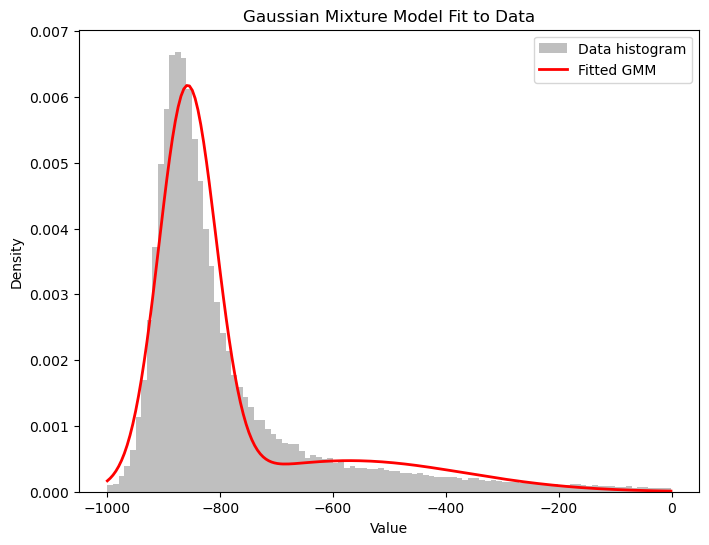

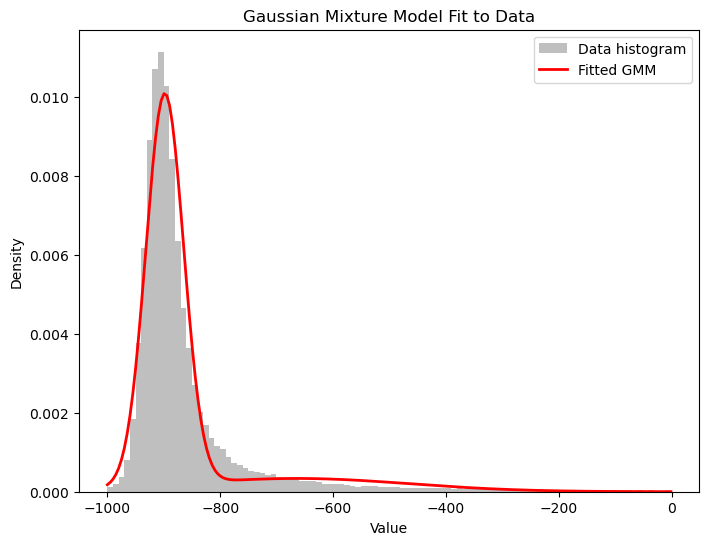

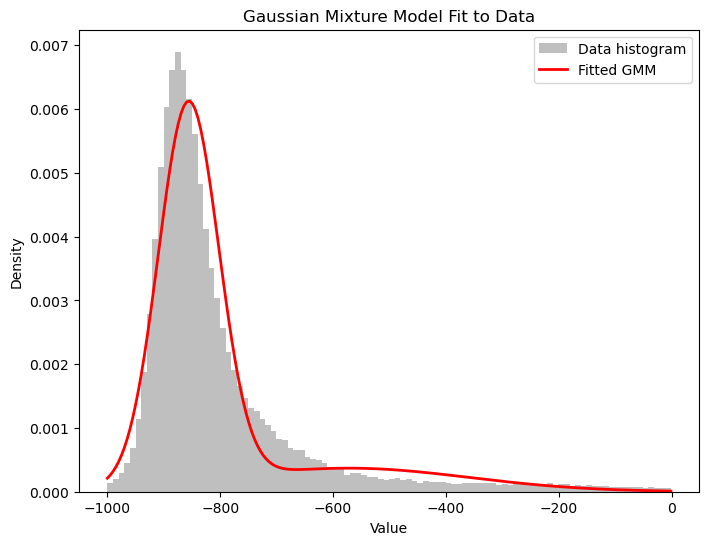

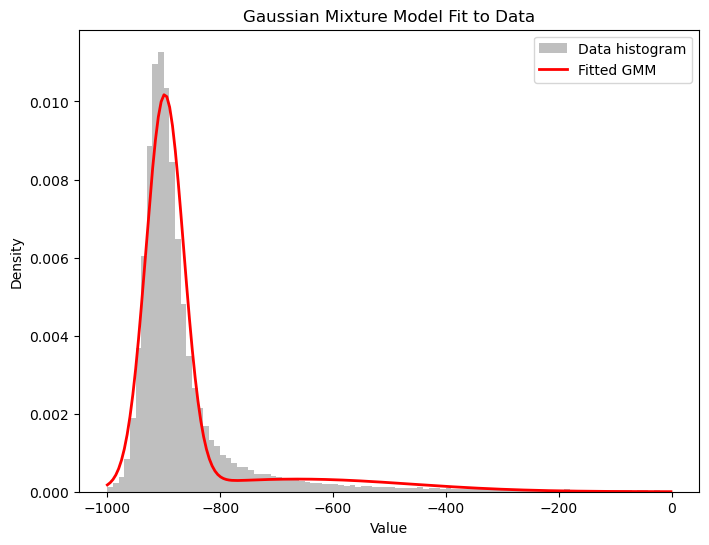

In [ ]:
warnings.filterwarnings("ignore", message=".*libiomp.*libomp.*incompatible.*")

for res_arr in res_arrs:
    plot_gmm(res_arr) 